# Departamento de vendas
- Base de dados: https://www.kaggle.com/c/rossmann-store-sales/data

## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### Dados de vendas

In [2]:
stateholiday = {'a': 'feriado público', 'b': 'páscoa', 'c': 'natal', '0': 'nenhum'}

In [3]:
sales_train_df = pd.read_csv('/content/train.csv')
sales_train_df.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
sales_train_df['DayOfWeek'].unique()
#1 = segunda-feira
#7 = domingo

array([5, 4, 3, 2, 1, 7, 6])

### Dados de Lojas



In [7]:
assortment = {'a': 'basic', 'b': 'basic', 'c': 'extended'}

In [8]:
store_info_df = pd.read_csv('/content/store.csv')
print(f'No dataset de vendas, temos informações sobre as {store_info_df.shape[0]} lojas presentes neste dataset de loja')

No dataset de vendas, temos informações sobre as 1115 lojas presentes neste dataset de loja


In [9]:
store_info_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [10]:
store_info_df.info()
print('Os valores 3, 4, 5, 7, 8, 9 possuem valores nulos')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
Os valores 3, 4, 5, 7, 8, 9 possuem valores nulos


In [11]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Exploração de dados

### Dados de vendas

Qtd registros de vendas: 1017209

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


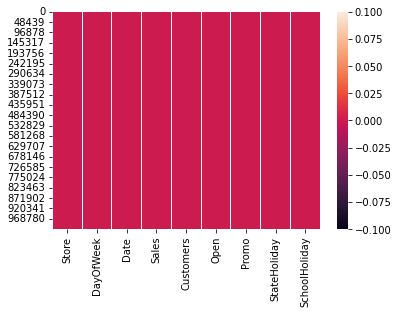

In [12]:
# Verificar dados faltantes na base de dados
print(f'Qtd registros de vendas: {len(sales_train_df)}', end='\n\n')
sns.heatmap(sales_train_df.isnull())
print(sales_train_df.isnull().sum())

In [13]:
sales_train_df.drop(sales_train_df.loc[sales_train_df['Date'].isnull()].index, inplace=True)
print(f'Qtd registros de vendas: {len(sales_train_df)}', end='\n\n')
print(sales_train_df.isnull().sum())

Qtd registros de vendas: 1017209

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0de802de50>,
      dtype=object)

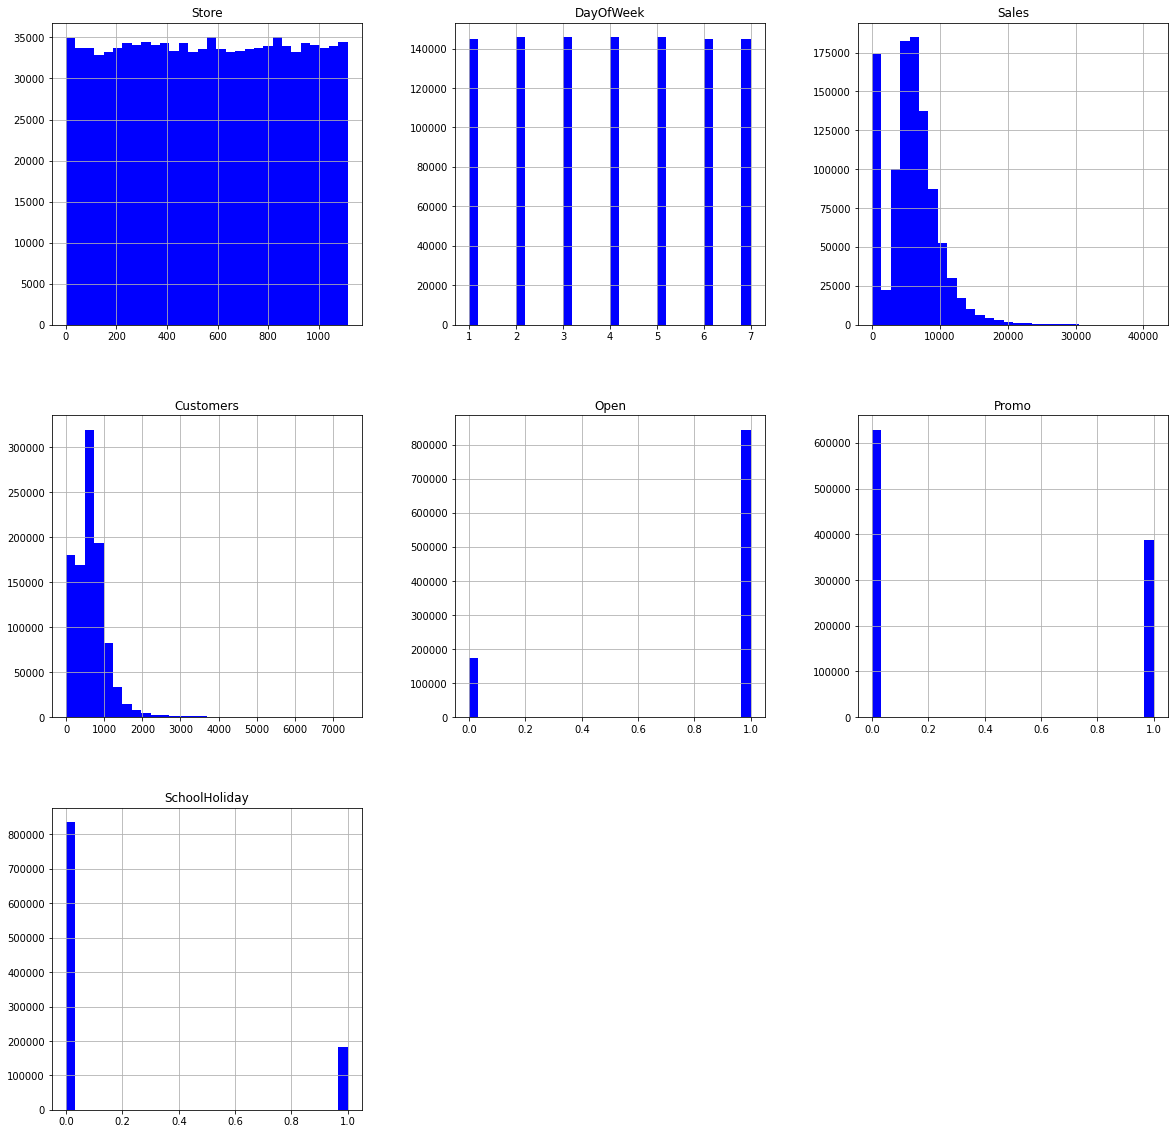

In [14]:
sales_train_df.hist(bins = 30, figsize = (20, 20), color = 'b')

In [15]:
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]
print(f'Total: {len(sales_train_df) / len(store_info_df)}\nNúmero de lojas/dias fechado: {len(closed_train_df) / len(store_info_df)}\nNúmero de lojas/dias aberto: {len(open_train_df) / len(store_info_df)}\n')

Total: 912.295067264574
Número de lojas/dias fechado: 154.99282511210762
Número de lojas/dias aberto: 757.3022421524664



In [16]:
# Temos que remover a parte da base de dados que contam com registros em que as lojas não abriram, esses dados impactam negativamente nos dados estatísticos
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]
# Vamos remover o campo Open, já que todos os dados são de quando as lojas estavam abertas
sales_train_df.drop(['Open'], axis = 1, inplace = True)
sales_train_df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(844392, 8)

In [17]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [18]:
# O valor de vendas e clientes aumentaram porque removemos os dados das lojas quando estavam fechadas
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


### Dados de lojas

In [19]:
store_info_df.isnull()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True
4,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...
1110,False,False,False,False,False,False,False,False,False,False
1111,False,False,False,False,False,False,False,True,True,True
1112,False,False,False,False,True,True,False,True,True,True
1113,False,False,False,False,True,True,False,True,True,True


In [20]:
# Se o mês não está preenchido, consequentemente o ano também não estará
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [21]:
# Se a semana da promoção não está preenchida, consequentemente o ano e o período também não estará
store_info_df[store_info_df['Promo2SinceWeek'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [22]:
# Se a loja não está participando da promoção, os outros dados da promoção estarão nulas
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [23]:
# Substituir valores nulos por 0
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear','PromoInterval', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
for col in str_cols:
  store_info_df[col].fillna(0, inplace=True)

In [24]:
# Substituir valores nulos da distancia dos concorrentes pela média
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

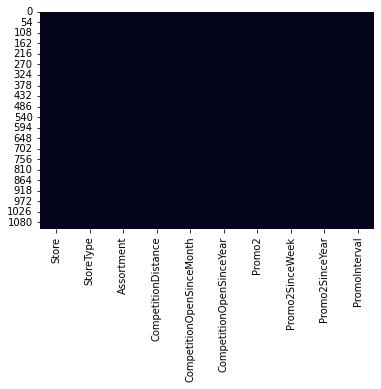

In [25]:
sns.heatmap(store_info_df.isnull(), cbar= False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0de77f7bd0>,
      dtype=object)

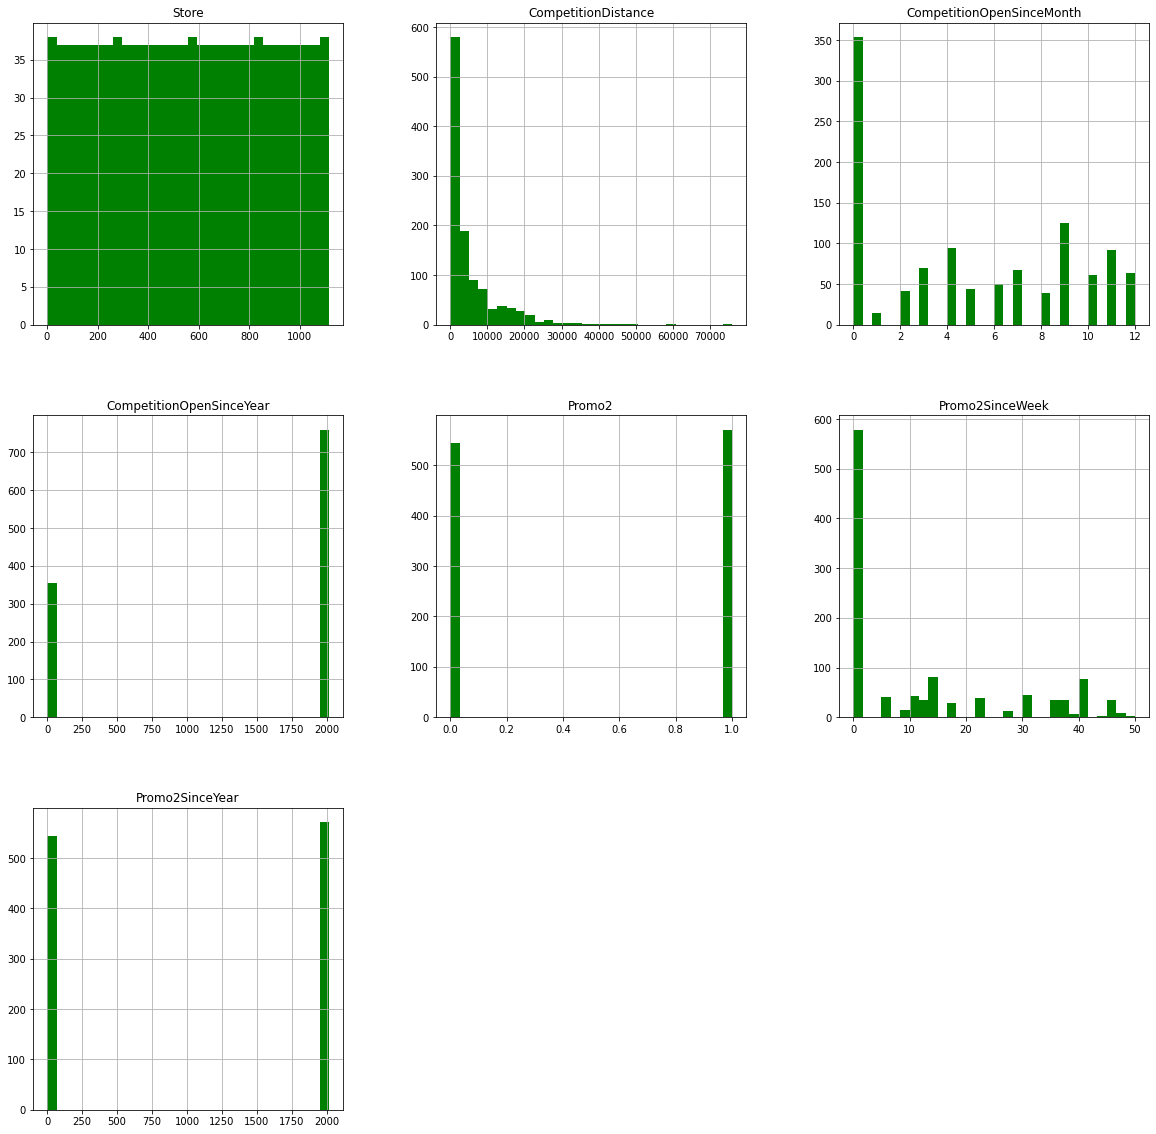

In [26]:
store_info_df.hist(bins = 30, figsize = (20, 20), color = 'g')

### Dados unidos (vendas + lojas)

In [27]:
# Realizando o Join dos dataframes
sales_info_all = pd.merge(sales_train_df, store_info_df, how='inner', on ='Store' )
sales_info_all.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844391,292,3,2013-01-02,5076,672,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


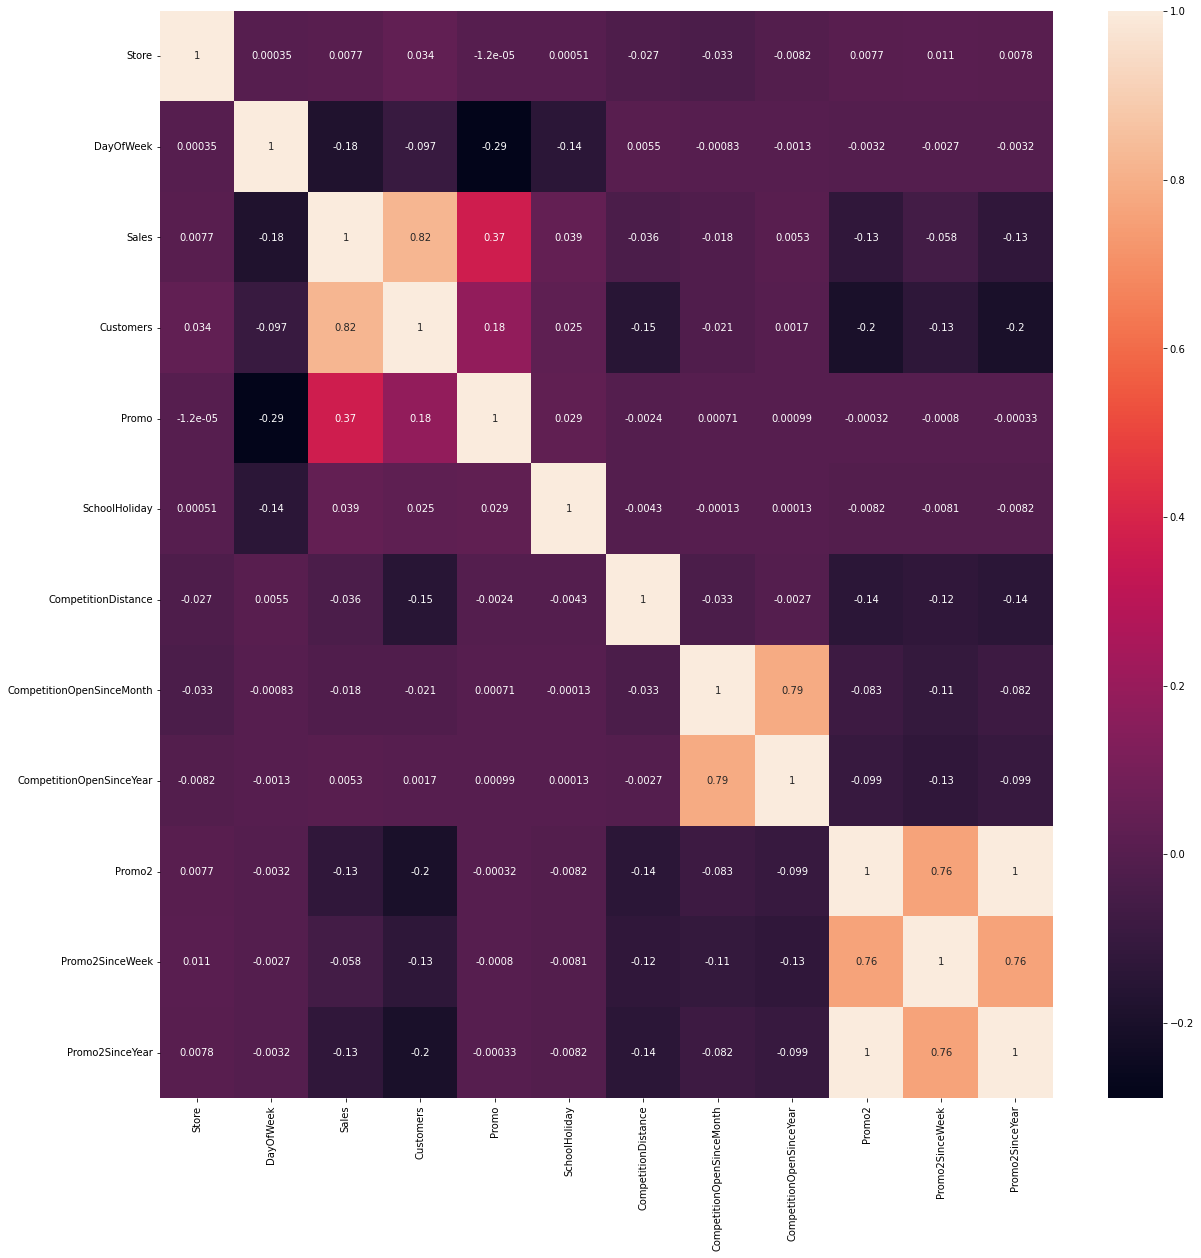

In [28]:
correlations = sales_info_all.corr()
f, ax = plt.subplots(figsize = (20, 20)) # f = figura | ax = eixo
sns.heatmap(correlations, annot = True)

In [29]:
# Ranking de correlações
correlations = sales_info_all.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [30]:
# Vamos dividir o atributo 'Data' visualizar melhor os agrupamentos na exploração de dados
sales_info_all['Year'] = pd.DatetimeIndex(sales_info_all['Date']).year
sales_info_all['Month'] = pd.DatetimeIndex(sales_info_all['Date']).month
sales_info_all['Day'] = pd.DatetimeIndex(sales_info_all['Date']).day
sales_info_all.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


Text(0.5, 1.0, 'Média de vendas por mês')

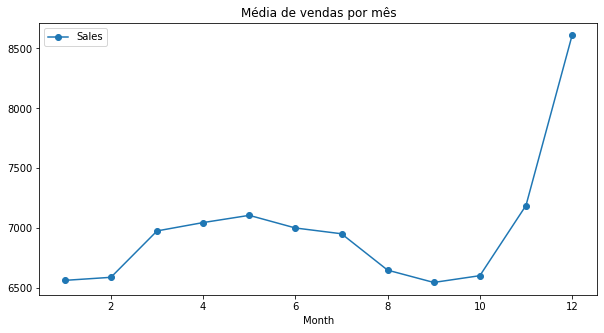

In [31]:
# Média de Vendas por mês
axis_sales_mean = sales_info_all.groupby('Month')[['Sales']].mean().plot(figsize=(10,5), marker='o')
axis_sales_mean.set_title('Média de vendas por mês')

Text(0.5, 1.0, 'Média de clientes por mês')

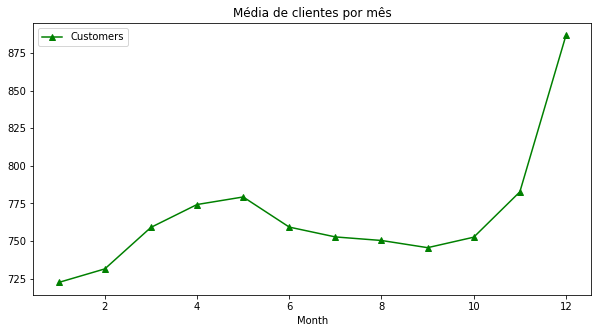

In [32]:
# Média clientes por mês
axis_customers_mean = sales_info_all.groupby('Month')[['Customers']].mean().plot(figsize=(10,5), marker='^', color='g')
axis_customers_mean.set_title('Média de clientes por mês')

Text(0.5, 1.0, 'Média de vendas por dia')

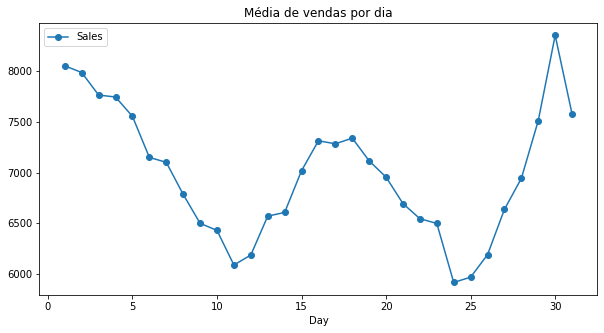

In [33]:
# Média de Vendas por dia
axis_sales_mean = sales_info_all.groupby('Day')[['Sales']].mean().plot(figsize=(10,5), marker='o')
axis_sales_mean.set_title('Média de vendas por dia')

Text(0.5, 1.0, 'Média de clientes por dia')

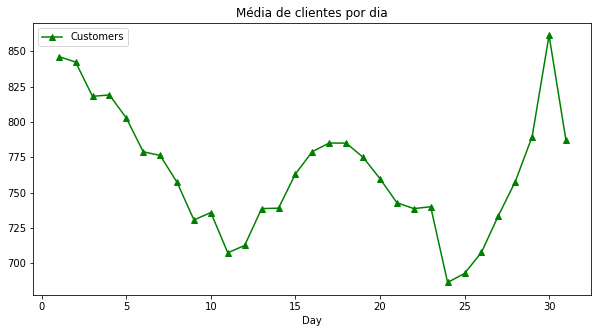

In [34]:
# Média de Vendas por dia
axis_customers_mean = sales_info_all.groupby('Day')[['Customers']].mean().plot(figsize=(10,5), marker='^', color='g')
axis_customers_mean.set_title('Média de clientes por dia')

Text(0.5, 1.0, 'Média de vendas por dia da semana')

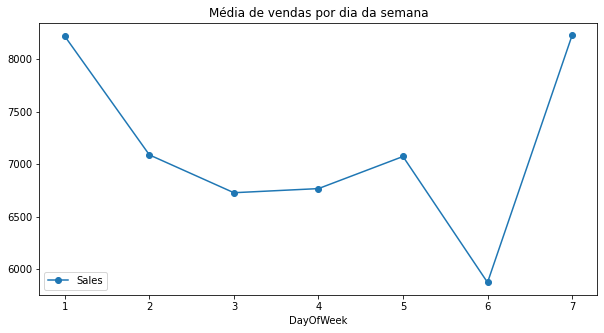

In [35]:
# Média de Vendas por dia  da semana
axis_sales_mean = sales_info_all.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5), marker='o')
axis_sales_mean.set_title('Média de vendas por dia da semana')

Text(0.5, 1.0, 'Média de clientes por dia da semana')

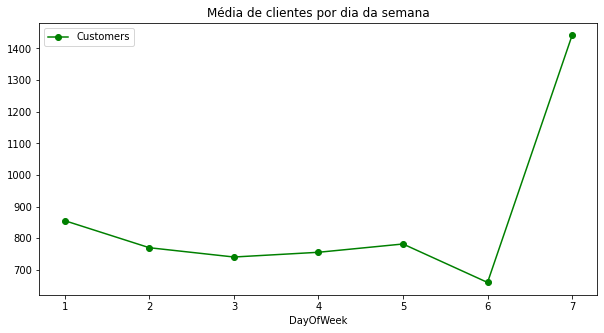

In [36]:
# Média de Clientes por dia  da semana
axis_sales_mean = sales_info_all.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5), marker='o', color='g')
axis_sales_mean.set_title('Média de clientes por dia da semana')

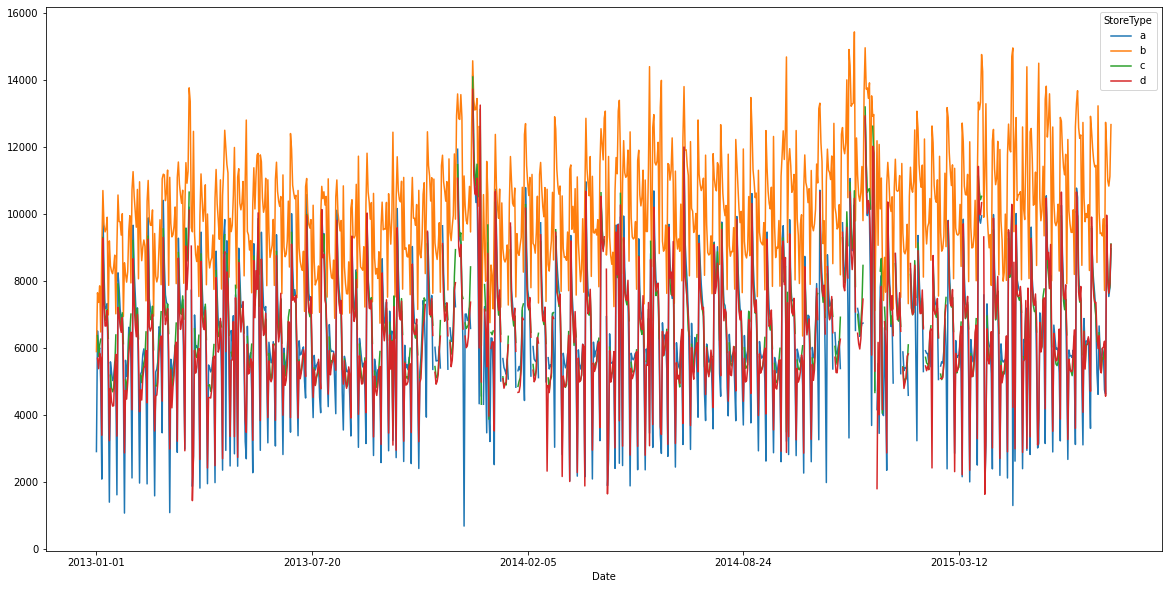

In [37]:
# Veriicar se há algum padrão de vendas baseado no tipo da loja
fig, ax = plt.subplots(figsize=(20, 10))
sales_info_all.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax) # | Unstack: separar os dados baseado no tipo da loja

Com os graficos tipo *barplot* abaixo, é possível notar que as promoções aumentam pouco o número de clientes nas lojas, porém aumenta consideravelmente o número de vendas. Uma explicação seria a de que os clientes compram mais produtos quando há promoção.

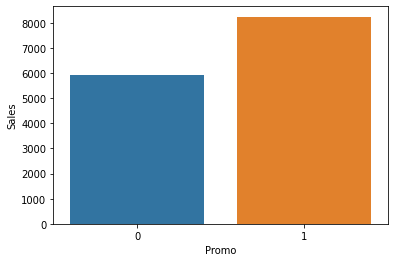

In [38]:
# Verificar se a promoção afeta as vendas e o número de vendas
sns.barplot(x = 'Promo', y = 'Sales', data = sales_info_all)

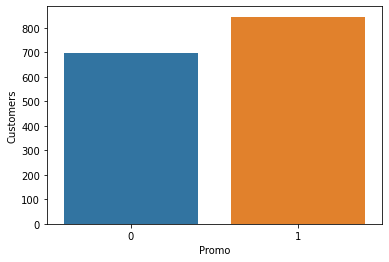

In [39]:
# Verificar se a promoção afeta as vendas e o número de clientes
sns.barplot(x = 'Promo', y = 'Customers', data = sales_info_all)

## Treinamento do modelo pt1

In [40]:
!pip install fbprophet
from fbprophet import Prophet

In [41]:
# Periods = Dias
def sales_predict(sales_df, periods, store_id = False):
  if store_id:
    sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date','Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'}) # É necessário renomear as colunas
  sales_df = sales_df.sort_values(by = 'ds') # É necessário ordenar os dados pela data
  
  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods) # Previsões futuras
  forecast = model.predict(future) # Previsões
  figure1 = model.plot(forecast, xlabel = 'Date', ylabel = 'Vendas') 
  figure2 = model.plot_components(forecast) # Dados sobre a série temporal
  return sales_df, forecast


- **Figure1**  
Os pontos pretos são os dados anteriores de vendas  Quando não há pontos pretos significa que são as previsões realizadas

- **Figure2**  
-- **Trend**: Tendência de vendas  
-- **Days of week**:  Dias da semana  
-- **Month of Year**: Meses do ano

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


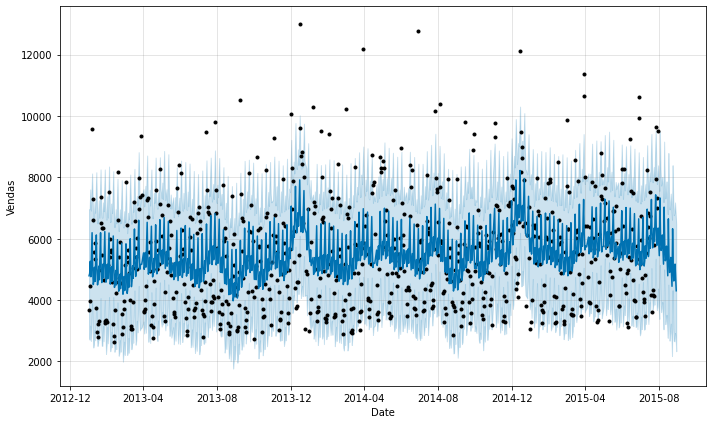

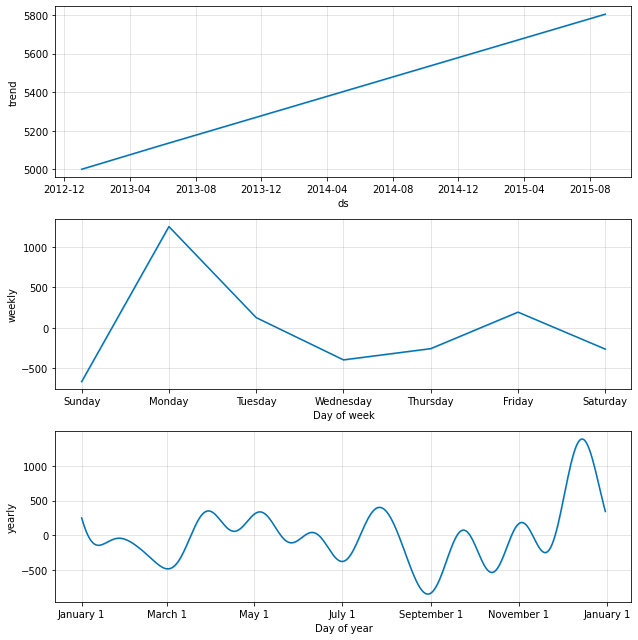

In [42]:
num_dias_previsoes = 30
loja = 21
df_origin, df_predict = sales_predict(sales_info_all, num_dias_previsoes, loja)

In [43]:
print(f'Os dados originais possuem {df_origin.shape[0]} colunas que representam um dia do ano. Já os dados previstos possuem {df_predict.shape[0]} colunas, ou seja, os {df_predict.shape[0]-df_origin.shape[0]} dias previstos foram adicionados nesse novo DataFrame')

Os dados originais possuem 777 colunas que representam um dia do ano. Já os dados previstos possuem 807 colunas, ou seja, os 30 dias previstos foram adicionados nesse novo DataFrame


In [44]:
# Dados previstos
df_predict.tail(num_dias_previsoes)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
777,2015-08-01,5781.079486,3737.452893,7839.315960,5781.079486,5781.079486,91.257038,91.257038,91.257038,-261.024428,-261.024428,-261.024428,352.281467,352.281467,352.281467,0.0,0.0,0.0,5872.336524
778,2015-08-02,5781.906428,3387.179187,7559.434146,5781.906428,5781.906428,-334.926064,-334.926064,-334.926064,-662.180987,-662.180987,-662.180987,327.254923,327.254923,327.254923,0.0,0.0,0.0,5446.980364
779,2015-08-03,5782.733370,5139.623634,9496.687378,5782.733370,5782.733370,1547.430256,1547.430256,1547.430256,1249.633470,1249.633470,1249.633470,297.796787,297.796787,297.796787,0.0,0.0,0.0,7330.163627
780,2015-08-04,5783.560313,4075.730302,8268.376610,5783.560313,5783.560313,391.572724,391.572724,391.572724,127.388198,127.388198,127.388198,264.184526,264.184526,264.184526,0.0,0.0,0.0,6175.133037
781,2015-08-05,5784.387255,3605.264265,7732.798189,5784.387255,5784.387255,-166.801577,-166.801577,-166.801577,-393.519019,-393.519019,-393.519019,226.717442,226.717442,226.717442,0.0,0.0,0.0,5617.585677
782,2015-08-06,5785.214197,3759.113921,7839.870641,5785.214197,5785.214197,-69.509241,-69.509241,-69.509241,-255.221818,-255.221818,-255.221818,185.712578,185.712578,185.712578,0.0,0.0,0.0,5715.704956
783,2015-08-07,5786.041139,3934.395079,8013.605849,5786.041139,5786.041139,336.426036,336.426036,336.426036,194.924585,194.924585,194.924585,141.501451,141.501451,141.501451,0.0,0.0,0.0,6122.467175
784,2015-08-08,5786.868081,3486.283123,7663.471847,5786.868081,5786.868081,-166.596800,-166.596800,-166.596800,-261.024428,-261.024428,-261.024428,94.427629,94.427629,94.427629,0.0,0.0,0.0,5620.271282
785,2015-08-09,5787.695024,3046.418372,7192.410864,5787.695023,5787.695024,-617.335835,-617.335835,-617.335835,-662.180987,-662.180987,-662.180987,44.845151,44.845151,44.845151,0.0,0.0,0.0,5170.359188
786,2015-08-10,5788.521966,4997.990445,9165.597249,5788.521650,5788.522114,1242.751208,1242.751208,1242.751208,1249.633470,1249.633470,1249.633470,-6.882262,-6.882262,-6.882262,0.0,0.0,0.0,7031.273174


In [45]:
df_predict[['ds', 'yhat']].tail(num_dias_previsoes).to_csv(f'previsoes_vendas_loja-{loja}.csv')

## Treinamento do modelo pt2 - Considerando feriados